# Problem statement

A Chinese automobile company aspires to enter the US market 
by setting up their manufacturing unit there and produce cars.
An automobile consulting company has gathered a large dataset of different types of cars across the American market. 

 

 

We need to find out which available featrures(variables) defined in the data set 
are viable and  useful for predicting the price of a car.
We are required to model the price of cars with the available independent variables.
It will be used by the management to understand how exactly the prices vary with the independent variables. 

## Business Goal

The model we predict will help management to understand the pricing dynamics of a new market. 

# Step 1 Reading and Understanding the Data

In [1]:
#importing the required files
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the given data file 
price=pd.read_csv("CarPrice_Assignment.csv")

#Observations on the given data
print(price.shape)

print(price.columns)

price.head(10)

(205, 26)
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##  No missing values in the given  data set

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Observations on the Data

<function matplotlib.pyplot.show(*args, **kw)>

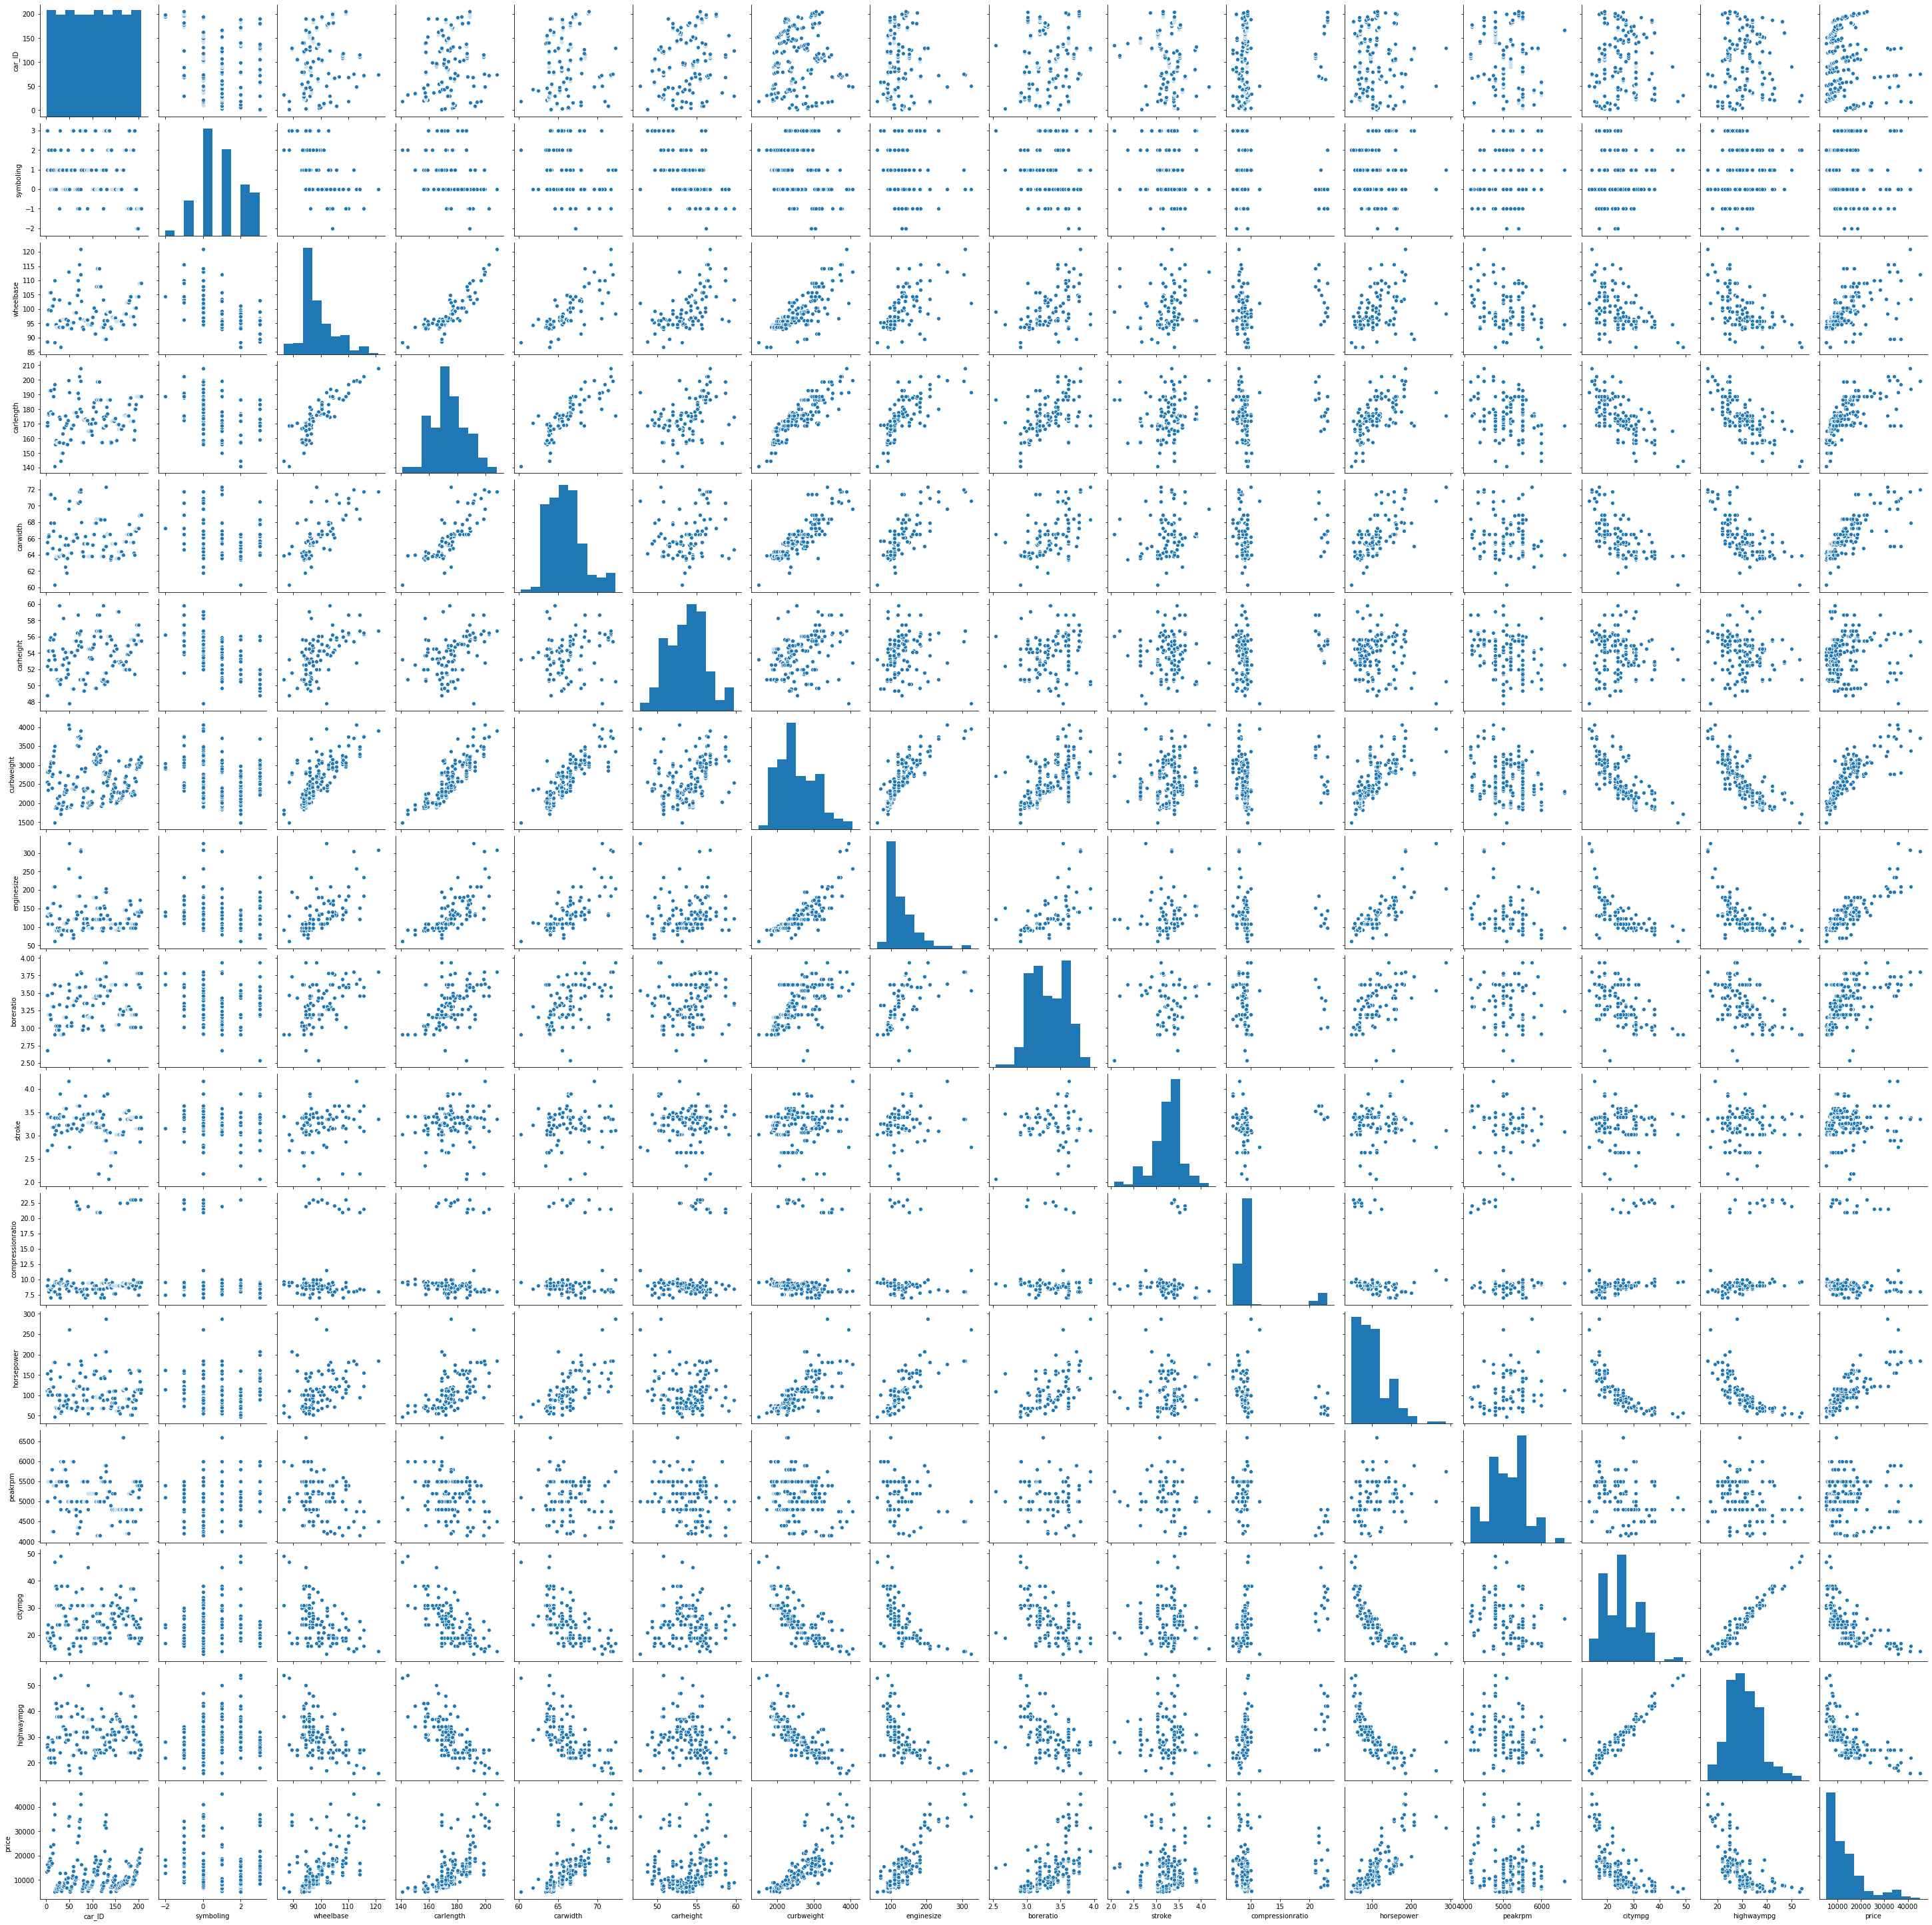

In [6]:
#Pair wise plot for all the features
sns.pairplot(price)
plt.show

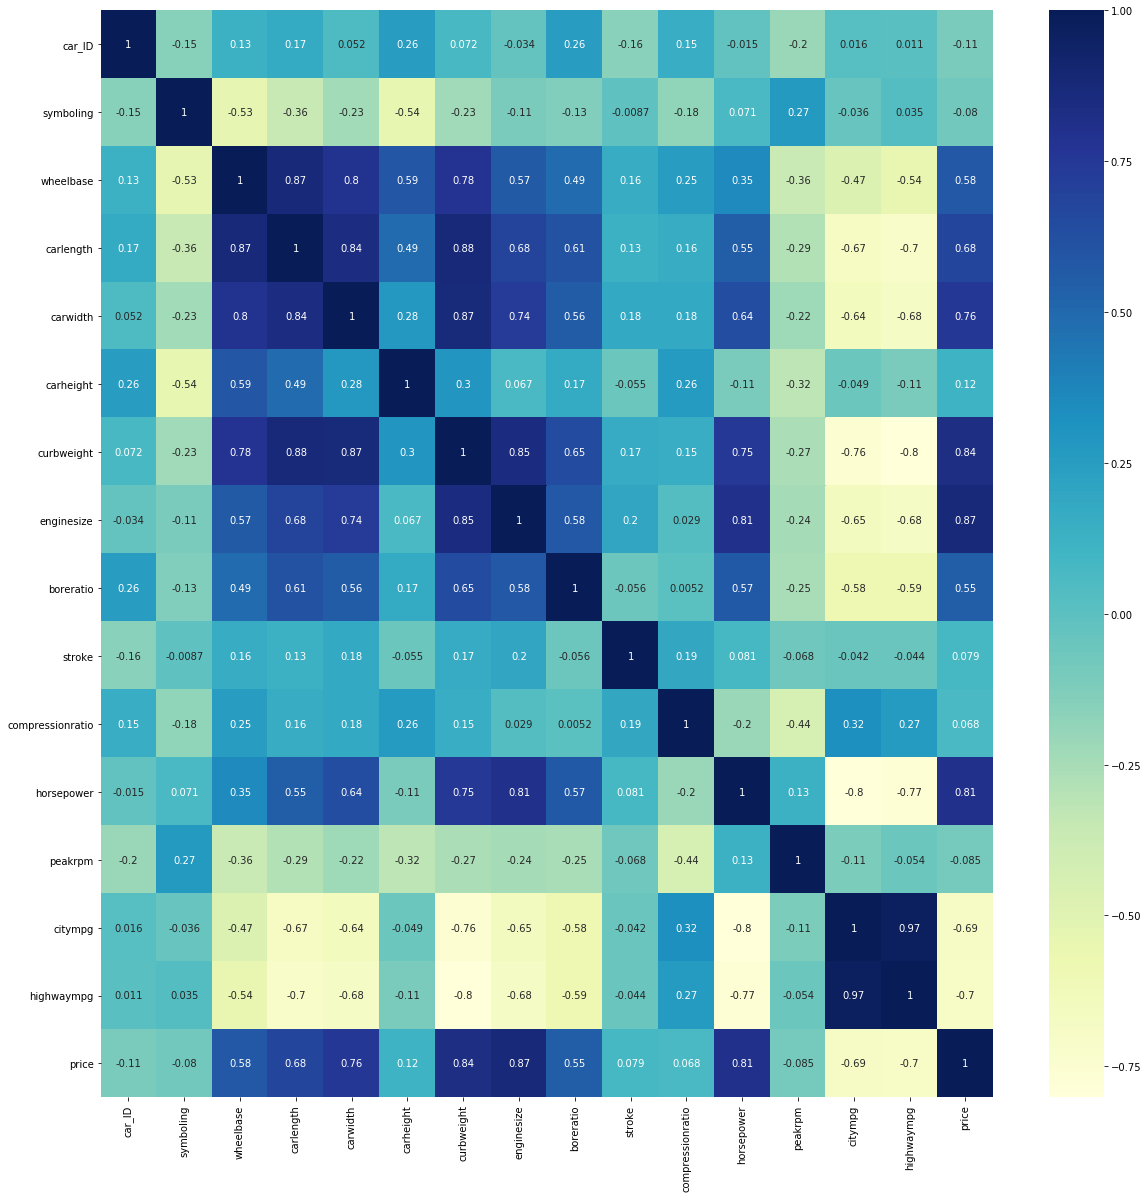

In [7]:
#Heat map for all the features
plt.figure(figsize = (20, 20))
cp=price.corr()
sns.heatmap(cp, annot = True, cmap="YlGnBu")
plt.show()

 ## From the above heatmap we could see that price is having high correlation with engine size,horsepower,curbweight,car width,car height,citympg and highwaympg.
 ## lets plot some pairwise plots between price and these categories

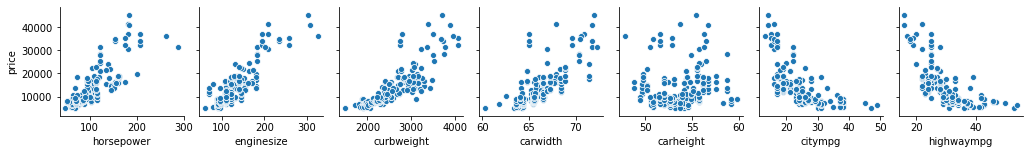

In [8]:
sns.pairplot(x_vars=['horsepower','enginesize','curbweight','carwidth','carheight','citympg','highwaympg'],y_vars='price',data=price,height=2)

#### From the above pairwise plot we could see there is a linear relation between price and these variables.


## we could see that there are lot categorigal variables
### lets visualize this for better understanding

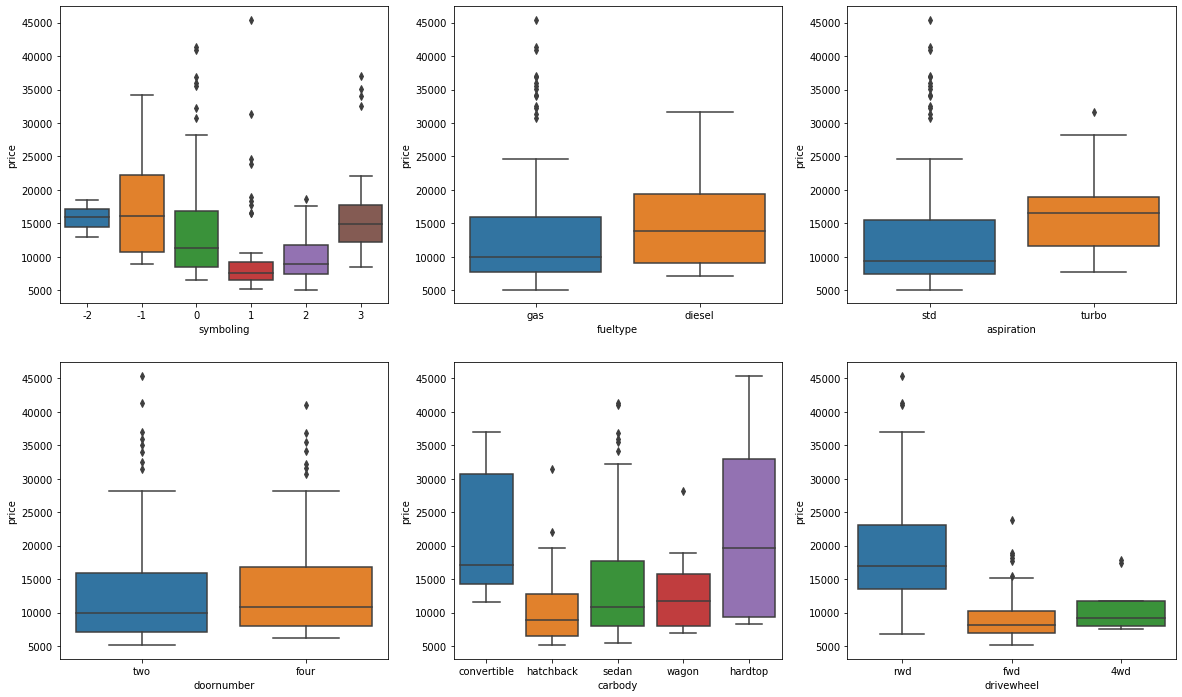

In [9]:
# drawing box plots 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = price)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = price)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = price)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = price)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = price)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = price)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

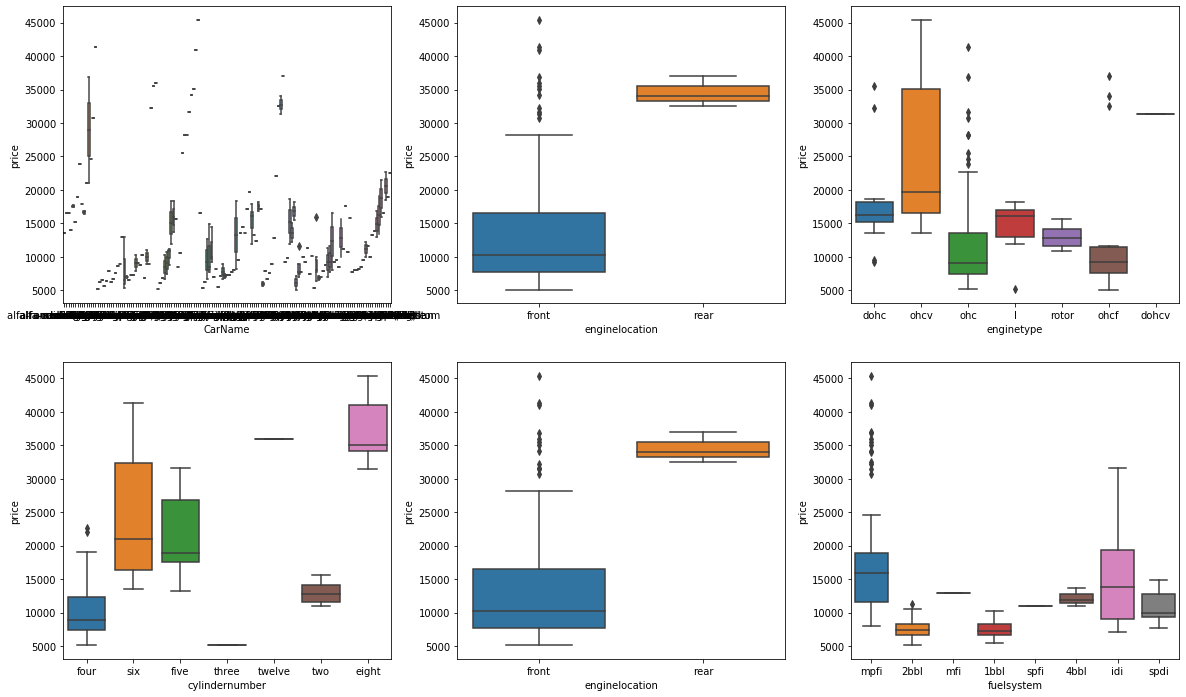

In [10]:
#drawing box plots--continuation
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'CarName', y = 'price', data = price)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginelocation', y = 'price', data = price)
plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = price)
plt.subplot(2,3,4)
sns.boxplot(x = 'cylindernumber', y = 'price', data = price)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = price)
plt.subplot(2,3,6)
sns.boxplot(x = 'fuelsystem', y = 'price', data = price)
plt.show

#### Fuel type seems to have an effect on the pricing of the cars.diesel type are slightly more priced more than gasoline version.
#### enginelocation is showing visible significant pattern.
#### Eight and six cylinders have high pricing followed by five and four.
#### The price of real wheel drive is significantly higher that other drivewheel options.
#### hardtop and convertables cars are  priced higher than other body types available.
#### Aspiration type Turbo is pricer than sti though sti has high priced variants.

# Step 2 Data Preparation

#### There is a variable named CarName which is comprised of two parts -
#### the first word is the name of 'car company' and the second is the 'car model'. 
#### For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 
#### You need to consider only company name as the independent variable for model building. 

In [11]:
price['CarName']=price['CarName'].apply(lambda x: x.split( )[0])

In [12]:
price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
price['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
vw              2
renault         2
maxda           2
toyouta         1
Nissan          1
mercury         1
vokswagen       1
porcshce        1
Name: CarName, dtype: int64

In [14]:
# Correcting the misspelled company names.
price['CarName'].replace('maxda','mazda',inplace=True)
price['CarName'].replace('Nissan','nissan',inplace=True)
price['CarName'].replace('porcshce','porsche',inplace=True)
price['CarName'].replace('toyouta','toyota',inplace=True)
price['CarName'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

price['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CarName, dtype: int64

average car price:  13276.710570731706
CarName
jaguar     34600.000000
buick      33647.000000
porsche    31400.500000
bmw        26118.750000
volvo      18063.181818
Name: price, dtype: float64


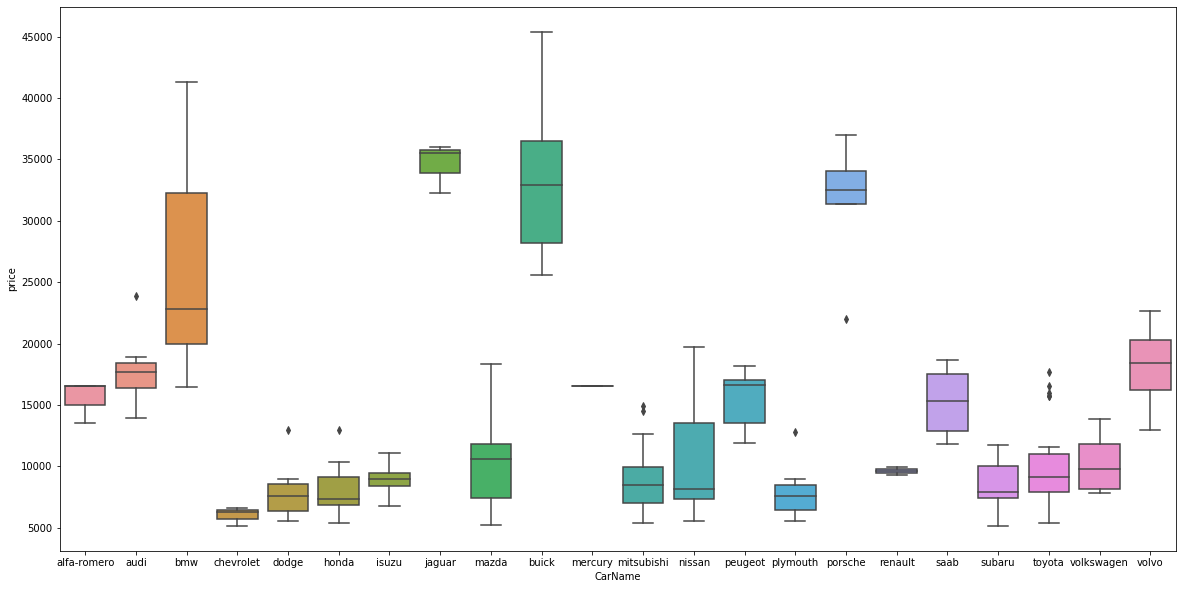

In [15]:
# Plotting price against Car Brand
plt.figure(figsize=(20,10))
sns.boxplot(x = 'CarName', y = 'price', data = price)
plt.show

print('average car price: ',price['price'].mean())
print(price.groupby('CarName').price.mean().sort_values(ascending=False).head())

#### Average US car price is $13276.
#### Audi,jaguar, Buick, Porsche, BMW, Volvo are clearly on the high end side, priced well above the average US cars price.
#### some companies manfacture high priced models thats were we see outliers coming from.

#### Clearly company name shows effect on price

## Convert the Categorical data into numerical data

In [16]:
#binary categorical variables
# fueltype,aspiration,doortype and engine location.
price['fueltype'] = price.fueltype.map(dict(gas=1, diesel = 0))
price['fueltype'].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [17]:
price['aspiration'] = price.aspiration.map(dict(std=1, turbo = 0))
price['aspiration'].value_counts()

1    168
0     37
Name: aspiration, dtype: int64

In [18]:
price['doornumber'] = price.doornumber.map(dict(two=1, four = 0))
price['doornumber'].value_counts()

0    115
1     90
Name: doornumber, dtype: int64

In [19]:
price['enginelocation'] = price.enginelocation.map(dict(front=1, rear = 0))
price['enginelocation'].value_counts()

1    202
0      3
Name: enginelocation, dtype: int64

## Dealing with Dummy variables

In [20]:
# identify the dummy variables
#use pd.get_dummies

In [21]:
price = pd.get_dummies(price)

In [22]:
# Some observations after addressing the dummy variables.
price.info()
price.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   fueltype               205 non-null    int64  
 3   aspiration             205 non-null    int64  
 4   doornumber             205 non-null    int64  
 5   enginelocation         205 non-null    int64  
 6   wheelbase              205 non-null    float64
 7   carlength              205 non-null    float64
 8   carwidth               205 non-null    float64
 9   carheight              205 non-null    float64
 10  curbweight             205 non-null    int64  
 11  enginesize             205 non-null    int64  
 12  boreratio              205 non-null    float64
 13  stroke                 205 non-null    float64
 14  compressionratio       205 non-null    float64
 15  horsep

(205, 72)

In [23]:
price.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


# Step 3 modelling 
## Splitting the Data into Train and Test Sets

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
# Now we have two sets df_train as train set and df_test as test set

df_train.shape
df_test.shape

(62, 72)

# Scaling the train set

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#here we are using minmax scaler

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','carlength','wheelbase','carwidth','carheight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


## Dividing into X and y sets for the model building

In [28]:

df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


In [29]:
# Seperating the y variable(price) from train set as y_train
y_train = df_train.pop('price')
# Keeping all the remaining variables under x_train 
X_train = df_train

In [30]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [31]:
X_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0



### RFE (Recursive feature elimination)

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE and selecting 15 features best describing the price of cars
rfe = rfe.fit(X_train, y_train)

In [34]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 53),
 ('symboling', False, 47),
 ('fueltype', False, 8),
 ('aspiration', False, 3),
 ('doornumber', False, 43),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 34),
 ('carwidth', True, 1),
 ('carheight', False, 27),
 ('curbweight', False, 54),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', False, 41),
 ('peakrpm', False, 5),
 ('citympg', False, 19),
 ('highwaympg', False, 18),
 ('CarName_alfa-romero', False, 35),
 ('CarName_audi', False, 25),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 24),
 ('CarName_chevrolet', False, 30),
 ('CarName_dodge', False, 17),
 ('CarName_honda', False, 28),
 ('CarName_isuzu', False, 52),
 ('CarName_jaguar', False, 31),
 ('CarName_mazda', False, 49),
 ('CarName_mercury', False, 55),
 ('CarName_mitsubishi', False, 14),
 ('CarName_nissan', False, 48),
 ('CarName_peugeot', False, 2),
 ('CarName_plymouth', False, 20),
 ('CarName_po

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carwidth', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_porsche', 'carbody_convertible',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carlength', 'carheight', 'curbweight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'CarName_alfa-romero',
       'CarName_audi', 'CarName_buick', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda',
       'CarName_mercury', 'CarName_mitsubishi', 'CarName_nissan',
       'CarName_peugeot', 'CarName_plymouth', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_six',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsyst

# lets build the model with these variables and observe further

In [37]:
import statsmodels.api as sm 

# adding a constant
X_train_sm=X_train[col]
X_train_sm=sm.add_constant(X_train_sm)



In [38]:
X_train_sm.head()

,const,enginelocation,wheelbase,carwidth,enginesize,boreratio,stroke,CarName_bmw,CarName_porsche,carbody_convertible,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,1.0,1,0.244828,0.291667,0.139623,0.230159,0.525253,0,0,0,0,0,1,0,0,0
125,1.0,1,0.272414,0.666667,0.339623,1.000000,0.464646,0,1,0,0,0,1,0,0,0
166,1.0,1,0.272414,0.308333,0.139623,0.444444,0.449495,0,0,0,0,0,1,0,0,0
1,1.0,1,0.068966,0.316667,0.260377,0.626984,0.247475,0,0,1,0,0,1,0,0,0
199,1.0,1,0.610345,0.575000,0.260377,0.746032,0.484848,0,0,0,0,0,1,0,0,0


In [39]:
# fitting the model with OLS
# create linear regression between y_train and x_train_sm
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#parameters

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.56e-66
Time:                        17:42:57   Log-Likelihood:                 205.02
No. Observations:                 143   AIC:                            -380.0
Df Residuals:                     128   BIC:                            -335.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0797      0.084      0.945      0.347      -0.087       0.247
enginelocation           -0.3020      0.081     -3.731      0.000      -0.462      -0.142
wheelbase                 0.0883      0.054      1.631      0.105      -0.019       0.195
carwidth                  0.3540      0.077      4.609      0.000       0.202       0.506
enginesize                1.4153      0.179      7.888      0.000       1.060       1.770
boreratio                -0.2870      0.063     -4.586      0.000      -0.411      -0.163
stroke                   -0.2267      0.057     -3.975      0.000      -0.339      -0.114
CarName_bmw               0.2649      0.029      9.032      0.000       0.207       0.323
CarName_porsche           0.1839      0.053      3.442      0.001       0.078       0.290
carbody_convertible       0.0824      0.039      2.086      0.039       0.004       0.161
enginetype_rotor          0.2317      0.039      5.955      0.000       0.155       0.309
cylindernumber_five       0.1605      0.037      4.297      0.000       0.087       0.234
cylindernumber_four       0.1654      0.046      3.580      0.000       0.074       0.257
cylindernumber_three      0.3663      0.084      4.375      0.000       0.201       0.532
cylindernumber_twelve    -0.4294      0.119     -3.619      0.000      -0.664      -0.195
cylindernumber_two        0.2317      0.039      5.955      0.000       0.155       0.309
==============================================================================
Omnibus:                       27.162   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.589
Skew:                           0.882   Prob(JB):                     2.81e-11
Kurtosis:                       5.245   Cond. No.                     5.72e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Pvalues and significance

#### All the features are showing low p values > 0.05 except wheelbase lets remove




In [40]:
X_train_sm=X_train_sm.drop(['wheelbase'],axis=1)
X_train_sm.columns

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_porsche', 'carbody_convertible',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [41]:
# fitting the model with OLS
# create linear regression between y_train and x_train_sm
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#parameters

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     125.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.12e-66
Time:                        17:43:03   Log-Likelihood:                 203.55
No. Observations:                 143   AIC:                            -379.1
Df Residuals:                     129   BIC:                            -337.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0831      0.085      0.979      0.329      -0.085       0.251
enginelocation           -0.3180      0.081     -3.932      0.000      -0.478      -0.158
carwidth                  0.4353      0.059      7.401      0.000       0.319       0.552
enginesize                1.4672      0.178      8.257      0.000       1.116       1.819
boreratio                -0.2939      0.063     -4.678      0.000      -0.418      -0.170
stroke                   -0.2409      0.057     -4.247      0.000      -0.353      -0.129
CarName_bmw               0.2732      0.029      9.397      0.000       0.216       0.331
CarName_porsche           0.1424      0.047      3.012      0.003       0.049       0.236
carbody_convertible       0.0560      0.036      1.545      0.125      -0.016       0.128
enginetype_rotor          0.2374      0.039      6.088      0.000       0.160       0.315
cylindernumber_five       0.1645      0.038      4.386      0.000       0.090       0.239
cylindernumber_four       0.1797      0.046      3.938      0.000       0.089       0.270
cylindernumber_three      0.3916      0.083      4.729      0.000       0.228       0.555
cylindernumber_twelve    -0.4828      0.115     -4.208      0.000      -0.710      -0.256
cylindernumber_two        0.2374      0.039      6.088      0.000       0.160       0.315
==============================================================================
Omnibus:                       26.004   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.287
Skew:                           0.891   Prob(JB):                     6.57e-10
Kurtosis:                       4.979   Cond. No.                     6.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### For carbody_convertible we observe high p-value
### lets drop carbody_convertible

In [42]:

X_train_sm=X_train_sm.drop(['carbody_convertible'],axis=1)

X_train_sm.columns

Index(['const', 'enginelocation', 'carwidth', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [43]:
# fitting the model with OLS
# create linear regression between y_train and x_train_sm
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#parameters

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.80e-67
Time:                        17:43:10   Log-Likelihood:                 202.23
No. Observations:                 143   AIC:                            -378.5
Df Residuals:                     130   BIC:                            -340.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0645      0.084      0.764      0.446      -0.103       0.232
enginelocation           -0.3060      0.081     -3.782      0.000      -0.466      -0.146
carwidth                  0.4177      0.058      7.200      0.000       0.303       0.532
enginesize                1.5990      0.157     10.201      0.000       1.289       1.909
boreratio                -0.3286      0.059     -5.567      0.000      -0.445      -0.212
stroke                   -0.2799      0.051     -5.484      0.000      -0.381      -0.179
CarName_bmw               0.2713      0.029      9.291      0.000       0.214       0.329
CarName_porsche           0.1449      0.047      3.050      0.003       0.051       0.239
enginetype_rotor          0.2613      0.036      7.257      0.000       0.190       0.332
cylindernumber_five       0.1823      0.036      5.082      0.000       0.111       0.253
cylindernumber_four       0.2076      0.042      4.926      0.000       0.124       0.291
cylindernumber_three      0.4212      0.081      5.199      0.000       0.261       0.581
cylindernumber_twelve    -0.5579      0.104     -5.339      0.000      -0.765      -0.351
cylindernumber_two        0.2613      0.036      7.257      0.000       0.190       0.332
==============================================================================
Omnibus:                       24.597   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.603
Skew:                           0.877   Prob(JB):                     6.83e-09
Kurtosis:                       4.799   Cond. No.                     3.43e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Now we see the p-values are low.
## Lets validate with VIF

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,enginetype_rotor,inf
13,cylindernumber_two,inf
0,const,267.96
3,enginesize,21.91
10,cylindernumber_four,12.79
4,boreratio,5.58
2,carwidth,4.27
9,cylindernumber_five,2.85
12,cylindernumber_twelve,2.85
5,stroke,2.42



## vif values inf says perfect mutlicolinearity lets remove enginetype_rotor , cylindernumber_two

In [46]:
X_train_sm=X_train_sm.drop(['enginetype_rotor','cylindernumber_two'],axis=1)

In [47]:
X_train_sm.head()

,const,enginelocation,carwidth,enginesize,boreratio,stroke,CarName_bmw,CarName_porsche,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve
122,1.0,1,0.291667,0.139623,0.230159,0.525253,0,0,0,1,0,0
125,1.0,1,0.666667,0.339623,1.000000,0.464646,0,1,0,1,0,0
166,1.0,1,0.308333,0.139623,0.444444,0.449495,0,0,0,1,0,0
1,1.0,1,0.316667,0.260377,0.626984,0.247475,0,0,0,1,0,0
199,1.0,1,0.575000,0.260377,0.746032,0.484848,0,0,0,1,0,0


In [48]:
# fitting the model with OLS
# create linear regression between y_train and x_train_sm
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#parameters

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.90e-58
Time:                        17:45:12   Log-Likelihood:                 177.92
No. Observations:                 143   AIC:                            -331.8
Df Residuals:                     131   BIC:                            -296.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2554      0.095      2.694      0.008       0.068       0.443
enginelocation           -0.3334      0.095     -3.493      0.001      -0.522      -0.145
carwidth                  0.4752      0.068      7.003      0.000       0.341       0.609
enginesize                0.6132      0.092      6.640      0.000       0.431       0.796
boreratio                -0.0188      0.048     -0.390      0.697      -0.114       0.076
stroke                   -0.0563      0.048     -1.172      0.243      -0.151       0.039
CarName_bmw               0.2250      0.034      6.687      0.000       0.158       0.292
CarName_porsche           0.0854      0.055      1.546      0.124      -0.024       0.195
cylindernumber_five       0.0097      0.032      0.306      0.760      -0.053       0.072
cylindernumber_four      -0.0607      0.024     -2.541      0.012      -0.108      -0.013
cylindernumber_three      0.1063      0.081      1.316      0.190      -0.053       0.266
cylindernumber_twelve    -0.0608      0.093     -0.653      0.515      -0.245       0.124
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.291
Skew:                           0.515   Prob(JB):                      0.00214
Kurtosis:                       4.000   Cond. No.                         42.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  high p values for boreratio , stroke , CarName_porsche , cylindernumber_five ,  cylindernumber_three , cylindernumber_twelve
### lets remove them

In [49]:
X_train_sm=X_train_sm.drop(['boreratio','stroke','CarName_porsche','cylindernumber_five','cylindernumber_three','cylindernumber_twelve'],axis=1)

In [50]:
X_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,123,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,0,1,0,0,0,0,0,0
125,126,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,0,0,0,0,1,0,0
166,167,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,1,0,0
199,200,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,1,0,0


In [51]:
# fitting the model with OLS
# create linear regression between y_train and x_train_sm
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#parameters

lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.93e-64
Time:                        17:45:35   Log-Likelihood:                 174.65
No. Observations:                 143   AIC:                            -337.3
Df Residuals:                     137   BIC:                            -319.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3347      0.077      4.337      0.000       0.182       0.487
enginelocation         -0.4259      0.077     -5.564      0.000      -0.577      -0.274
carwidth                0.4752      0.054      8.872      0.000       0.369       0.581
enginesize              0.5537      0.068      8.192      0.000       0.420       0.687
CarName_bmw             0.2248      0.032      6.935      0.000       0.161       0.289
cylindernumber_four    -0.0741      0.018     -4.042      0.000      -0.110      -0.038
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.545
Skew:                           0.450   Prob(JB):                       0.0139
Kurtosis:                       3.791   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
y_train.shape

(143,)

In [53]:
# 
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,160.28
3,enginesize,2.92
2,carwidth,2.61
5,cylindernumber_four,1.74
4,CarName_bmw,1.14
1,enginelocation,1.10


## Now as you can see, the VIFs and p-values both are with in an acceptable range. So we go ahead and make our predictions .

# Step 4- Residual Analysis 

In [54]:
y_train_pred = lr_model.predict(X_train_sm)


In [55]:
y_train_pred

122    0.050613
125    0.339555
166    0.058533
1      0.129350
199    0.252118
         ...   
87     0.139048
103    0.405073
67     0.559740
24     0.033898
8      0.494660
Length: 143, dtype: float64

In [56]:
y_train_pred.shape

(143,)

In [57]:
y_train.shape

(143,)

Text(0.5, 0, 'Distribution of Errors')

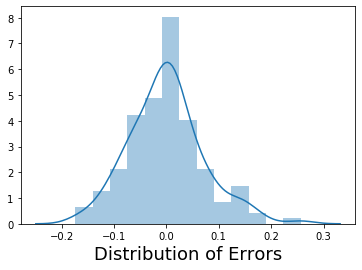

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))

plt.xlabel('Distribution of Errors', fontsize = 18)                         

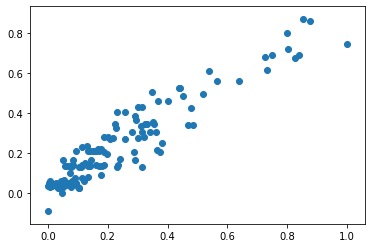

In [59]:
plt.scatter(y_train,y_train_pred)

plt.show()

# Predictions on test set

### scaling the numerical variables
### we are only tranforming  the test data as fit has already happened on the train set 

In [60]:
num_vars = ['symboling','carlength','wheelbase','carwidth','carheight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,161,0.4,1,1,0,1,0.313793,0.409756,0.341667,0.460177,...,0,0,0,1,0,0,0,0,0,0
186,187,0.8,1,1,0,1,0.368966,0.497561,0.433333,0.699115,...,0,0,0,0,0,0,0,1,0,0
59,60,0.6,1,1,1,1,0.420690,0.596748,0.516667,0.522124,...,0,0,0,1,0,0,0,0,0,0
165,166,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
140,141,0.8,1,1,1,1,0.231034,0.263415,0.291667,0.699115,...,0,0,0,1,0,0,0,0,0,0


In [61]:
y_test = df_test.pop('price')
X_test = df_test

In [62]:
x=['enginelocation', 'carwidth', 'enginesize', 'CarName_bmw','cylindernumber_four' ]

In [63]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[x]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [64]:

# Making predictions
y_test_pred = lr_model.predict(X_test)


Text(0, 0.5, 'y_test_pred')

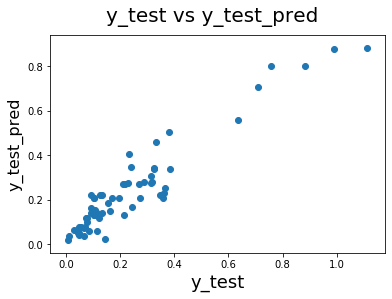

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)     

## Calculating the test set r Square

In [66]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8937620926737396

In [67]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8898204976433853

### test and train r square values are pretty close
###  we can say that what the model trained on training set is able to generalize the results on test set

In [68]:

#lr_model.params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.93e-64
Time:                        17:46:22   Log-Likelihood:                 174.65
No. Observations:                 143   AIC:                            -337.3
Df Residuals:                     137   BIC:                            -319.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3347      0.077      4.337      0.000       0.182       0.487
enginelocation         -0.4259      0.077     -5.564      0.000      -0.577      -0.274
carwidth                0.4752      0.054      8.872      0.000       0.369       0.581
enginesize              0.5537      0.068      8.192      0.000       0.420       0.687
CarName_bmw             0.2248      0.032      6.935      0.000       0.161       0.289
cylindernumber_four    -0.0741      0.018     -4.042      0.000      -0.110      -0.038
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.545
Skew:                           0.450   Prob(JB):                       0.0139
Kurtosis:                       3.791   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We can see that the equation of our best fitted line is:

### price=(enginelocation*-0.4259) + (carwidth*0.4752) + (enginesize*0.5537) + (CarName_bmw*0.2248) +(cylindernumber_four*-0.0741)

# CONCLUSIONS ACCORDING TO ABOVE PREDICTED MODEL

## Based on the above observations we can clearly see that high-end brands like BMW are having their cars priced at high value.
## The size of the engine and car-width is also playing a major factor in car pricing.
## Cars having Engine location being front and 4-cylinder cars are showing bit low prices compared to other features.
